In [1]:
# data manipulation
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy import stats
import scipy.stats as stats

In [2]:
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# prediction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv('housing costs.csv', index_col="Date", parse_dates=True)
data.head(10)

,Owner without a mortgage ($),Owner with a mortgage ($),Renter state or territory housing authority ($),Renter private landlord ($)
Date,,,,
1999–00,36.00,351.00,118.00,277.00
2000–01,36.00,346.00,115.00,272.00
2002–03,37.00,365.00,120.00,281.00
2003–04,37.00,415.00,123.00,289.00
2005–06,40.00,463.00,139.00,307.00
2007–08,42.00,494.00,135.00,344.00
2009–10,43.00,498.00,146.00,373.00
2011–12,46.00,500.00,158.00,402.00
2013–14,52.00,499.00,163.00,414.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1999–00 to Source: Australian Bureau of Statistics, Housing Occupancy and Costs 2019-20 financial year
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Owner without a mortgage ($)                     12 non-null     float64
 1   Owner with a mortgage ($)                        12 non-null     float64
 2   Renter state or territory housing authority ($)  12 non-null     float64
 3   Renter private landlord ($)                      12 non-null     float64
dtypes: float64(4)
memory usage: 760.0+ bytes


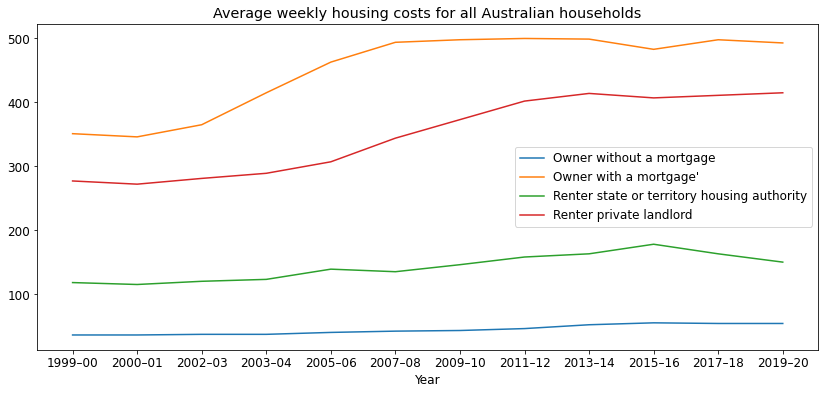

In [34]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Average weekly housing costs for all Australian households")

# Line chart showing weekly housing costs of "Owner without mortgage"
sns.lineplot(data = data['Owner without a mortgage ($)'], label="Owner without a mortgage")

# Line chart showing weekly housing costs of "Owner with a mortgage ($)"
sns.lineplot(data = data['Owner with a mortgage ($)'], label="Owner with a mortgage'")

# Line chart showing weekly housing costs of "Owner with a mortgage ($)"
sns.lineplot(data = data['Renter state or territory housing authority ($)'], label="Renter state or territory housing authority")


# Line chart showing weekly housing costs of "Owner with a mortgage ($)"
sns.lineplot(data = data['Renter private landlord ($)'], label="Renter private landlord")

# Add label for horizontal axis
plt.xlabel("Year")

plt.rcParams.update({'font.size': 12})

In [7]:
def correlation(data):
    plt.figure(figsize=(30,10))
    sns.heatmap(data.corr(), annot=True, cmap="Blues", linewidths=1, linecolor='lightblue') 
    plt.title('Correlation Matrix', fontsize=20);
    plt.show()
   

In [8]:
def find_corr(x,y):
    x = np.corrcoef(x, y)
    print("The correlation coefficient is:\n\n",color.BLUE + f"{x}" + color.END)

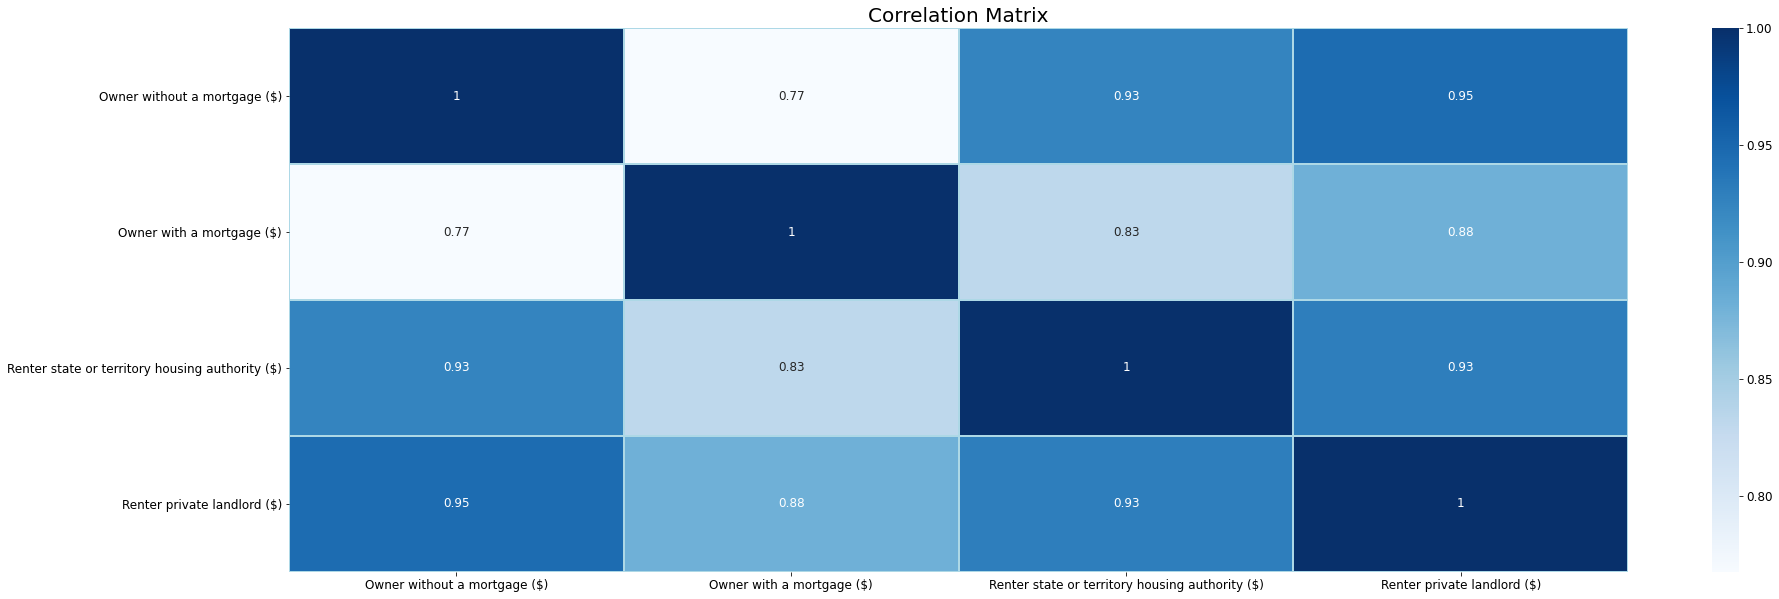

In [9]:
correlation(data)
plt.rcParams.update({'font.size': 17})

In [10]:
data['owner'] = data['Owner without a mortgage ($)'] + data['Owner with a mortgage ($)']
data
data['renter'] = data['Renter state or territory housing authority ($)'] + data['Renter private landlord ($)']
data

,Owner without a mortgage ($),Owner with a mortgage ($),Renter state or territory housing authority ($),Renter private landlord ($),owner,renter
Date,,,,,,
1999–00,36.00,351.00,118.00,277.00,387.00,395.00
2000–01,36.00,346.00,115.00,272.00,382.00,387.00
2002–03,37.00,365.00,120.00,281.00,402.00,401.00
2003–04,37.00,415.00,123.00,289.00,452.00,412.00
2005–06,40.00,463.00,139.00,307.00,503.00,446.00
2007–08,42.00,494.00,135.00,344.00,536.00,479.00
2009–10,43.00,498.00,146.00,373.00,541.00,519.00
2011–12,46.00,500.00,158.00,402.00,546.00,560.00
2013–14,52.00,499.00,163.00,414.00,551.00,577.00


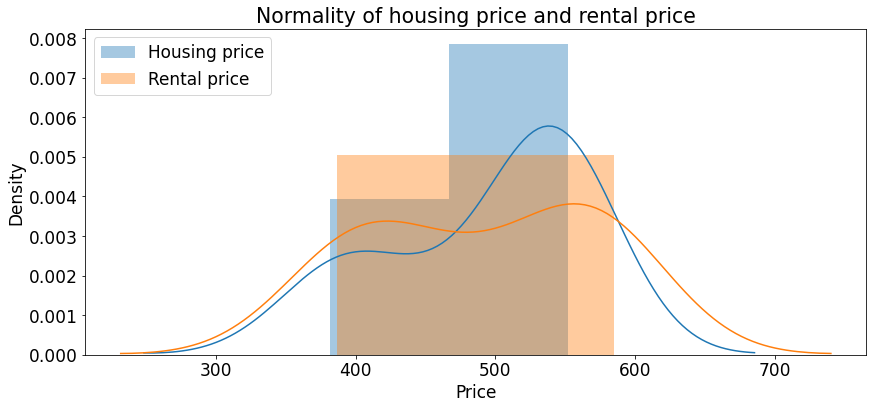

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

sns.distplot(data['owner'], label = "housing price")
sns.distplot(data['renter'], label = "rental price")

# Add label for horizontal axis
plt.xlabel("Price")

# Add label for vertical axis
plt.ylabel("Density")

plt.title('Normality of housing price and rental price')
plt.legend(loc='upper left', labels=['Housing price', 'Rental price'])

### Hypothesis test

C:\Users\TRAN YEN CHI\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


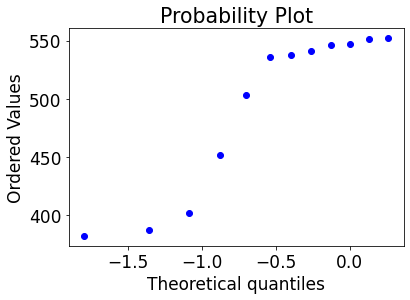

In [12]:
import pylab
import scipy.stats as stats

stats.probplot(data['owner'], dist="norm", plot=pylab)
pylab.show()

In [13]:
#perform Jarque-Bera test
from scipy.stats import jarque_bera
result = (jarque_bera(data['owner']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: nan
p-value: nan


C:\Users\TRAN YEN CHI\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


## Sydney data

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
df_rent = pd.read_excel('Syd_rent.xlsx', index_col="Date", parse_dates=True)
df_sell = pd.read_excel('Syd_sell.xlsx', index_col="Date", parse_dates=True)
df_rent.head(10)

,All houses,3 br houses,All units,2 bed units,Combined
Date,,,,,
2009-08-01,560,556,392,398,477
2009-09-01,566,554,391,401,475
2009-10-01,571,571,397,406,484
2009-11-01,572,578,400,407,487
2009-12-01,580,576,401,408,491
2010-01-01,582,579,402,411,492
2010-02-01,587,584,406,416,496
2010-03-01,590,588,408,418,501
2010-04-01,594,595,409,420,503


In [15]:
df_rent.describe()

,All houses,3 br houses,All units,2 bed units,Combined
count,154.00,154.00,154.00,154.00,154.00
mean,673.55,672.33,472.49,484.90,562.01
std,48.17,46.02,34.36,36.99,36.66
min,560.00,554.00,391.00,398.00,475.00
25%,639.00,639.25,450.00,458.00,538.00
50%,675.00,680.50,475.00,491.00,562.50
75%,709.00,706.75,503.75,518.00,593.50
max,804.00,785.00,526.00,541.00,627.00


In [16]:
df_sell.tail(10)

,All houses,3 br houses,All units,2 bed units,Combined
Date,,,,,
2021-08-01,1549841,1446846,699493,766117,1198146
2021-09-01,1664130,1509309,706349,761621,1215277
2021-10-01,1694004,1513637,703264,758425,1237819
2021-11-01,1716721,1522313,704370,747668,1245929
2021-12-01,1758772,1569634,714533,767626,1294809
2022-01-01,1743407,1522973,710067,778102,1274337
2022-02-01,1777675,1602801,714640,772506,1295414
2022-03-01,1758218,1572492,724502,757153,1279009
2022-04-01,1752852,1570058,717081,762351,1275028


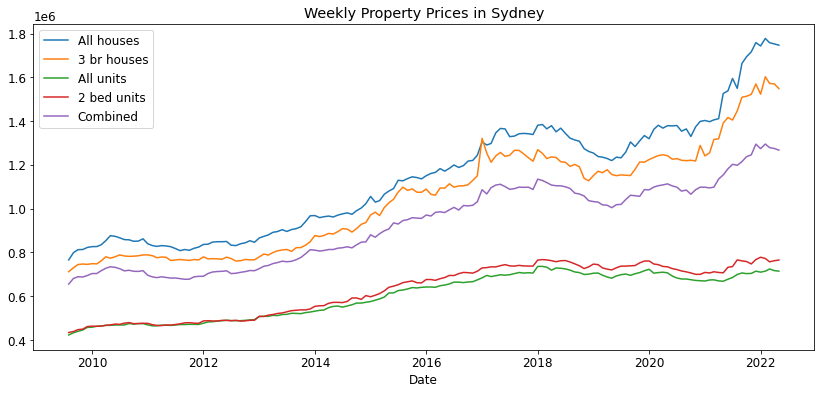

In [33]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Weekly Property Prices in Sydney")


sns.lineplot(data = df_sell['All houses'], label="All houses")

sns.lineplot(data = df_sell['3 br houses'], label="3 br houses")

sns.lineplot(data = df_sell['All units'], label="All units")

sns.lineplot(data = df_sell['2 bed units'], label="2 bed units")

sns.lineplot(data = df_sell['Combined'], label="Combined")

# Add label for horizontal axis
plt.xlabel("Date")

plt.rcParams.update({'font.size': 12})

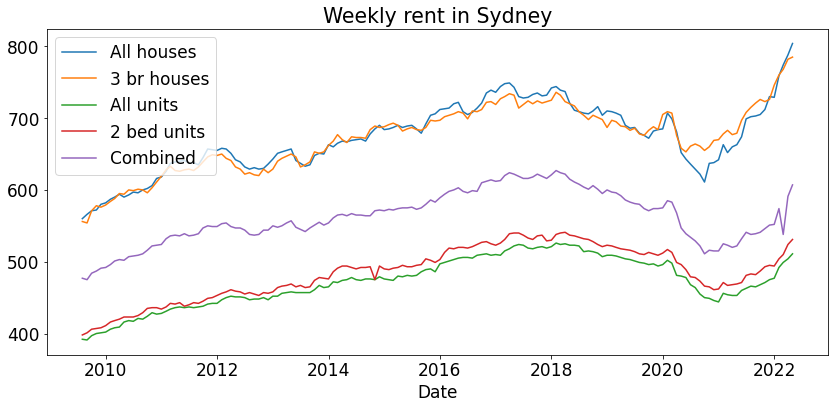

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Weekly rent in Sydney")


sns.lineplot(data = df_rent['All houses'], label="All houses")

sns.lineplot(data = df_rent['3 br houses'], label="3 br houses")

sns.lineplot(data = df_rent['All units'], label="All units")

sns.lineplot(data = df_rent['2 bed units'], label="2 bed units")

sns.lineplot(data = df_rent['Combined'], label="Combined")

# Add label for horizontal axis
plt.xlabel("Date")

plt.rcParams.update({'font.size': 12})

## OLS model

In [18]:
# a : the independent variable - housing price
# b : the variable which is dependent on a - rental price

a = df_sell["All houses"]
b = df_rent["All houses"]
M1 = sm.OLS(b,a).fit()
M1_sum = M1.summary()
M1_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             All houses   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              4424.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                   8.11e-115
Time:                        18:39:05   Log-Likelihood:                         -960.16
No. Observations:                 154   AIC:                                      1922.
Df Residuals:                     153   BIC:                                      1925.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
All houses     0.0006   8.54e-06     66.515      0.000       0.001       0.001
==============================================================================
Omnibus:                       13.323   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.422
Skew:                          -0.719   Prob(JB):                     0.000739
Kurtosis:                       2.575   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# c : the independent variable 
# d : the variable which is dependent on x

c = df_sell["All units"]
d = df_rent["All units"]
M1 = sm.OLS(d,c).fit()
M1_sum = M1.summary()
M1_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              All units   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.251e+04
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                   1.24e-148
Time:                        18:39:05   Log-Likelihood:                         -827.21
No. Observations:                 154   AIC:                                      1656.
Df Residuals:                     153   BIC:                                      1659.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
All units      0.0008   6.88e-06    111.854      0.000       0.001       0.001
==============================================================================
Omnibus:                     1221.507   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.596
Skew:                          -0.077   Prob(JB):                     0.000677
Kurtosis:                       1.500   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rent data: the relationship between house and unit

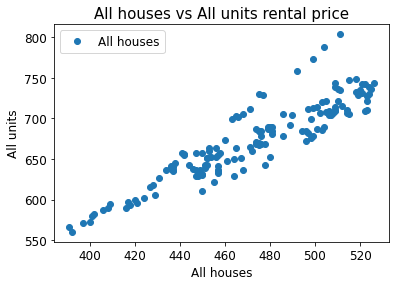

In [20]:
df_rent.plot(x='All units', y='All houses', style='o') 
plt.title('All houses vs All units rental price', fontsize = 15)
plt.xlabel("All houses")
plt.ylabel('All units')
plt.show()

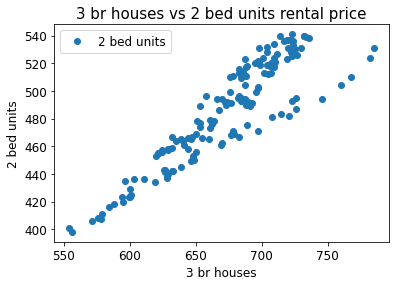

In [21]:
df_rent.plot(x='3 br houses', y='2 bed units', style='o') 
plt.title('3 br houses vs 2 bed units rental price', fontsize = 15)
plt.xlabel("3 br houses") 
plt.ylabel('2 bed units')
plt.show()

### Housing price data: the relationship between house and unit

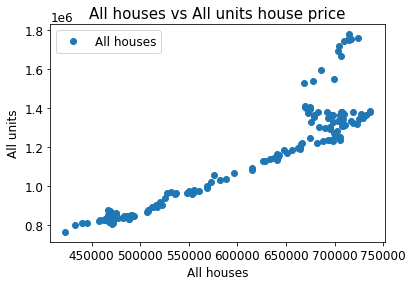

In [22]:
df_sell.plot(x='All units', y='All houses', style='o') 
plt.title('All houses vs All units house price', fontsize = 15)
plt.xlabel("All houses") 
plt.ylabel('All units')
plt.show()

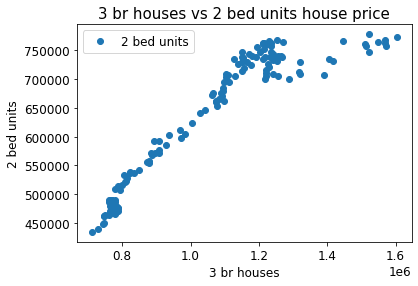

In [23]:
df_sell.plot(x='3 br houses', y='2 bed units', style='o') 
plt.title('3 br houses vs 2 bed units house price', fontsize = 15)
plt.xlabel("3 br houses") 
plt.ylabel("2 bed units")
plt.show()

### Relationship bw rent and house price 

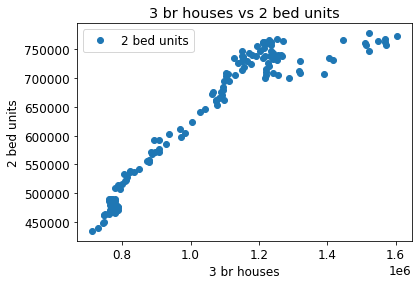

In [24]:
df_sell.plot(x='3 br houses', y='2 bed units', style='o') 
plt.title('3 br houses vs 2 bed units')
plt.xlabel("3 br houses") 
plt.ylabel("2 bed units")
plt.show()

## Interest rate data

In [25]:
pd.options.display.float_format = '{:,.2f}'.format
df_ir = pd.read_excel('interest_rate.xlsx', index_col="Date", parse_dates=True)
df_ir.tail(10)

,Cash rate target
Date,
2021-08-01,0.10
2021-09-01,0.10
2021-10-01,0.10
2021-11-01,0.10
2021-12-01,0.10
2022-01-01,0.10
2022-02-01,0.10
2022-03-01,0.10
2022-04-01,0.10


## GDP & Income

In [26]:
pd.options.display.float_format = '{:,.2f}'.format
df_gdp = pd.read_excel('gdp.xlsx', index_col="Date", parse_dates=True)
df_gdp.tail(10)

,GDP
Date,
2021-08-01,98.41
2021-09-01,98.68
2021-10-01,99.11
2021-11-01,99.59
2021-12-01,100.04
2022-01-01,100.40
2022-02-01,100.70
2022-03-01,100.95
2022-04-01,101.19


## Log model

### Level-log

In [27]:
## interest rate

M1_rent = df_rent["All houses"] + df_rent["All units"] + df_rent["3 br houses"] + df_rent["2 bed units"] + df_ir["Cash rate target"]
M1_sell = df_sell["All houses"] + df_sell["All units"] + df_sell["3 br houses"] + df_sell["2 bed units"] + df_ir["Cash rate target"]

M1_sell = sm.add_constant(M1_sell)

M1_log = sm.OLS(np.log(M1_rent), M1_sell).fit()
M1_s = M1_log.summary()
M1_s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     255.0
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           2.50e-34
Time:                        18:39:07   Log-Likelihood:                 265.73
No. Observations:                 154   AIC:                            -527.5
Df Residuals:                     152   BIC:                            -521.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4707      0.017    432.989      0.000       7.437       7.505
0           7.903e-08   4.95e-09     15.970      0.000    6.93e-08    8.88e-08
==============================================================================
Omnibus:                       19.402   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.761
Skew:                          -0.850   Prob(JB):                     3.10e-05
Kurtosis:                       2.415   Cond. No.                     1.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
## gdp

M2_rent = df_rent["All houses"] + df_rent["All units"] + df_rent["3 br houses"] + df_rent["2 bed units"] + df_gdp["GDP"]
M2_sell = df_sell["All houses"] + df_sell["All units"] + df_sell["3 br houses"] + df_sell["2 bed units"] + df_gdp["GDP"]

M2_sell = sm.add_constant(M2_sell)
M2_log = sm.OLS(np.log(M2_rent), M2_sell).fit()
M2_s = M2_log.summary()
M2_s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           1.87e-34
Time:                        18:39:07   Log-Likelihood:                 271.31
No. Observations:                 154   AIC:                            -538.6
Df Residuals:                     152   BIC:                            -532.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5211      0.017    451.981      0.000       7.488       7.554
0           7.645e-08   4.77e-09     16.019      0.000     6.7e-08    8.59e-08
==============================================================================
Omnibus:                       19.731   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.770
Skew:                          -0.847   Prob(JB):                     3.09e-05
Kurtosis:                       2.393   Cond. No.                     1.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## linear

In [29]:
M3_rent = df_rent["All houses"] + df_rent["All units"] + df_rent["3 br houses"] + df_rent["2 bed units"] + np.log(df_ir["Cash rate target"])
M3_sell = df_sell["All houses"] + df_sell["All units"] + df_sell["3 br houses"] + df_sell["2 bed units"] + np.log(df_ir["Cash rate target"])


M3_sell = sm.add_constant(M3_sell)
M3_log = sm.OLS(M3_rent, M3_sell).fit()
M3_s = M3_log.summary()
M3_s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     260.2
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           9.64e-35
Time:                        18:39:07   Log-Likelihood:                -923.49
No. Observations:                 154   AIC:                             1851.
Df Residuals:                     152   BIC:                             1857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.2607     38.959     43.334      0.000    1611.290    1765.232
0              0.0002   1.12e-05     16.129      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.284   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.798
Skew:                          -0.789   Prob(JB):                     8.28e-05
Kurtosis:                       2.339   Cond. No.                     1.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
M4_rent = df_rent["All houses"] + df_rent["All units"] + df_rent["3 br houses"] + df_rent["2 bed units"] + np.log(df_gdp["GDP"])
M4_sell = df_sell["All houses"] + df_sell["All units"] + df_sell["3 br houses"] + df_sell["2 bed units"] + np.log(df_gdp["GDP"])

M4_sell = sm.add_constant(M4_sell)
M4_log = sm.OLS(M4_rent, M4_sell).fit()
M4_s = M4_log.summary()
M4_s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     266.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           2.78e-35
Time:                        18:39:07   Log-Likelihood:                -922.68
No. Observations:                 154   AIC:                             1849.
Df Residuals:                     152   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.8385     38.754     43.553      0.000    1611.273    1764.404
0              0.0002   1.11e-05     16.338      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.352   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.812
Skew:                          -0.789   Prob(JB):                     8.22e-05
Kurtosis:                       2.336   Cond. No.                     1.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
M5_rent = df_rent["All houses"] + df_rent["All units"] + df_rent["3 br houses"] + df_rent["2 bed units"] + df_gdp["GDP"]
M5_sell = df_sell["All houses"] + df_sell["All units"] + df_sell["3 br houses"] + df_sell["2 bed units"] + df_gdp["GDP"]

M5_sell = sm.add_constant(M5_sell)
M5_log = sm.OLS(M5_rent, M5_sell).fit()
M5_s = M5_log.summary()
M5_s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     262.0
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           6.87e-35
Time:                        18:39:07   Log-Likelihood:                -923.90
No. Observations:                 154   AIC:                             1852.
Df Residuals:                     152   BIC:                             1858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1783.7908     39.063     45.664      0.000    1706.614    1860.968
0              0.0002   1.12e-05     16.186      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.474   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.008
Skew:                          -0.794   Prob(JB):                     7.45e-05
Kurtosis:                       2.337   Cond. No.                     1.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df_rent["All houses"] = np.log(df_rent["All houses"])

## Granger Causality

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
#perform Granger-Causality test 